In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import os
from pandas_profiling import ProfileReport

In [2]:
os.getcwd()

'C:\\Users\\marc_\\OneDrive\\Documents\\Uni-TeaM-Photography-3\\2020T3\\MATH5386\\assesments\\ass2\\notebooks'

In [3]:
df = pd.read_csv("../data/raw/abalone/abalone.data", header = None)

In [4]:
pp = ProfileReport(df)
pp.to_widgets()

[9.74100729e-01 1.14183886e-02 8.37567021e-03 3.03865180e-03
 1.41047670e-03 1.22936128e-03 4.26722250e-04]
      Sex_F  Sex_I  Sex_M
0         0      0      1
1         0      0      1
2         1      0      0
3         0      0      1
4         0      1      0
...     ...    ...    ...
4172      1      0      0
4173      0      0      1
4174      0      0      1
4175      1      0      0
4176      0      0      1

[4177 rows x 3 columns]


,Sex_F,Sex_I,Sex_M,pca
0,0,0,1,-0.372971
1,0,0,1,-0.726930
2,1,0,0,-0.177005
3,0,0,1,-0.372241
4,0,1,0,-0.759040
...,...,...,...,...
4172,1,0,0,0.082163
4173,0,0,1,0.174010
4174,0,0,1,0.418951
4175,1,0,0,0.347918


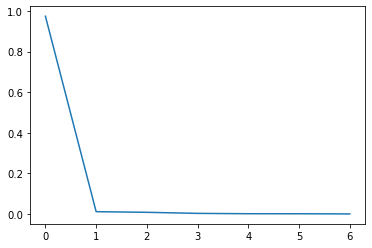

In [5]:

df2 = df.drop(['0','8'], axis=1)
df3 = MinMaxScaler().fit_transform(df2)
pca = PCA()
df3_pca = pca.fit_transform(df2)
plt.plot(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_) # PCA covers 97.41% of variance across numeric features 
sex = pd.get_dummies(df.iloc[:,0], prefix = "Sex")
print(sex)
df4 = pd.concat([sex, pd.Series(df3_pca[:,0], name = 'pca')], axis = 1)
df4

In [8]:
from sklearn.tree import DecisionTreeRegressor, plot_tree, DecisionTreeClassifier

In [9]:
dt = DecisionTreeClassifier()
dt.fit(df4, df.iloc[:,8])
# plot_tree(dt)
# plt.savefig("tree_reg_plot2.png", dpi = 1000)

Error in callback <function flush_figures at 0x00000246D6BCDCA8> (for post_execute):


KeyboardInterrupt: 